## The criminal data

Japan's National Police Agency publishes the criminal data.

https://www.npa.go.jp/toukei/seianki/h28zuhyousakuin.htm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
df_murder = pd.read_excel('h28.1-1-3-1.xlsx', skiprows=1)
df_murder

,Unnamed: 0,年次 区分,Unnamed: 2,Unnamed: 3,H19,H20,H21,H22,H23,H24,H25,H26,H27,H28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,死傷者合計(人),NaN,NaN,39022.000000,36281.000000,33175.000000,32723.000000,31712.000000,34096.000000,33399.000000,31979.000000,30103.000000,28957.000000
2,NaN,NaN,死者,NaN,1134.000000,1230.000000,1059.000000,1001.000000,969.000000,908.000000,819.000000,841.000000,802.000000,752.000000
3,NaN,NaN,NaN,人口10万人当たり,0.887525,0.963255,0.830523,0.781683,0.758222,0.712073,0.643377,0.661772,0.631024,0.592439
4,NaN,NaN,負傷者,NaN,37888.000000,35051.000000,32116.000000,31722.000000,30743.000000,33188.000000,32580.000000,31138.000000,29301.000000,28205.000000
5,NaN,NaN,NaN,人口10万人当たり,29.653051,27.449644,25.187044,24.771781,24.055744,26.026742,25.593690,24.502097,23.054408,22.220384


In [3]:
df_murder = df_murder.dropna(how='all').T.reset_index()
df_murder = df_murder.drop(columns=[3, 5])
df_murder = df_murder.drop([0, 1, 2, 3])
df_murder.columns = ['Year_JP', 'Total', 'Killed', 'Injured']
df_murder

,Year_JP,Total,Killed,Injured
4,H19,39022,1134,37888
5,H20,36281,1230,35051
6,H21,33175,1059,32116
7,H22,32723,1001,31722
8,H23,31712,969,30743
9,H24,34096,908,33188
10,H25,33399,819,32580
11,H26,31979,841,31138
12,H27,30103,802,29301
13,H28,28957,752,28205


In [4]:
df_murder['Year_JP'] = df_murder['Year_JP'].str.extract('(\d\d)').astype(int)
df_murder['Year'] = df_murder['Year_JP'] + 1988
df_murder

,Year_JP,Total,Killed,Injured,Year
4,19,39022,1134,37888,2007
5,20,36281,1230,35051,2008
6,21,33175,1059,32116,2009
7,22,32723,1001,31722,2010
8,23,31712,969,30743,2011
9,24,34096,908,33188,2012
10,25,33399,819,32580,2013
11,26,31979,841,31138,2014
12,27,30103,802,29301,2015
13,28,28957,752,28205,2016


In [5]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.grid': True,
    'axes.prop_cycle': cycler('color', ['#01579B', '#B71C1C', '#827717', '#1B5E20', '#F57F17', '#4A148C', '#1B5E20']),
    'axes.edgecolor': '#ffffff',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'legend.edgecolor': '#ffffff',
    'ps.fonttype': 42,
})

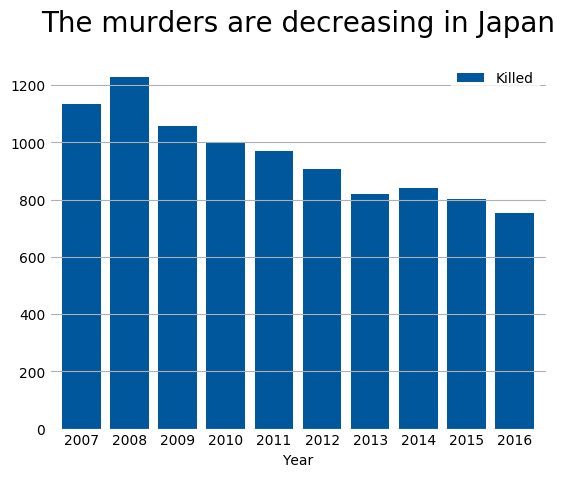

In [6]:
ax = df_murder[['Year', 'Killed']].plot(x='Year', kind='bar', width=0.8, rot=0)
ax.set_title('The murders are decreasing in Japan', pad=20)
ax.title.set_fontsize(20)
ax.grid(False, axis='x')
plt.savefig("graph-murders.pdf")
plt.show()